In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df= pd.read_csv('../DATA/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


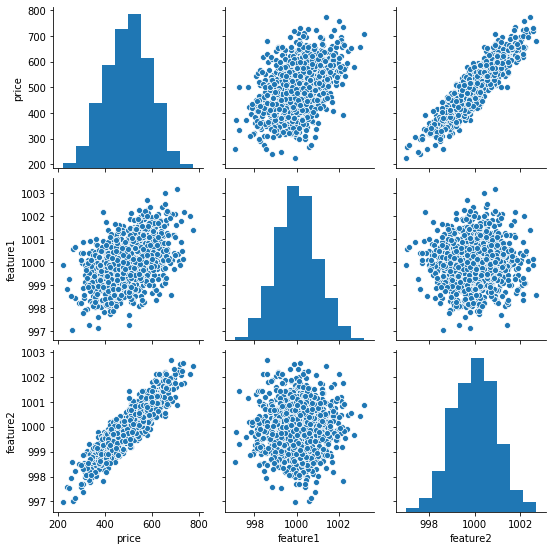

In [5]:
sns.pairplot(data=df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df[['feature1','feature2']].values# we use values to convert the data from pandas to numpy since it's numbers and we're working with tensorflow
y=df['price'].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler 

In [11]:
help(MinMaxScaler())

Help on MinMaxScaler in module sklearn.preprocessing._data object:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters

In [12]:
scaler=MinMaxScaler()

In [13]:
scaler.fit(X_train)# we only fit the train set so the model don't see the test set

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [16]:
from tensorflow.keras.models import Sequential # for models creation

In [17]:
from tensorflow.keras.layers import Dense,Activation # for layers addition

In [18]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`, then we create
 |  a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
 |  of the `input`, on every

In [19]:
"""model=Sequential([
    Dense(2),
    Dense(2),
    Dense(2)
])""" # Way 1 of adding layers to the network

'model=Sequential([\n    Dense(2),\n    Dense(2),\n    Dense(2)\n])'

In [20]:
model = Sequential()

In [21]:
"""model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))""" # way 2 of adding layers to the network

'model.add(Dense(2))\nmodel.add(Dense(2))\nmodel.add(Dense(2))'

In [27]:
model.add(Dense(4,activation='relu')) # specifiying the number of the nodes for each layer and the activation function used
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1)) # Final output node for prediction

model.compile(optimizer='rmsprop',loss='mse') # compile used to configures and sets up the model for training.
# optimizer: The optimisation algorithm used to find a local minimum of a given function.
# loss: A function that compares the target and predicted output values; measures how well the neural network models the training data

In [28]:
model.fit(X_train,y_train,epochs=250)# epochs:  indicates the number of passes(iterations) of the entire training dataset the machine learning algorithm has completed

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 277593.1562
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 257679.6406
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 238830.7031
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 214624.7812
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 185757.6719
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 153527.2500
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 119348.0469
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 84888.5078
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 52552.7266
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 25754.5996
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 8009.3066
Epoch 12/250
22/22 [==============================] - 0s 3ms/step - 

22/22 [==============================] - 0s 2ms/step - loss: 28.7868
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 29.8182
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 30.1030
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 26.1506
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 32.3726
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 28.0479
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 30.2460
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 29.3624
Epoch 206/250
22/22 [==============================] - 0s 2ms/step - loss: 29.7218
Epoch 207/250
22/22 [==============================] - 0s 2ms/step - loss: 28.8885
Epoch 208/250
22/22 [==============================] - 0s 2ms/step - loss: 30.0602
Epoch 209/250
22/22 [==============================] - 0s 2ms/step - loss: 28.0430
Epoch 210/250
22/2

In [36]:
loss=model.history.history['loss']# loss values

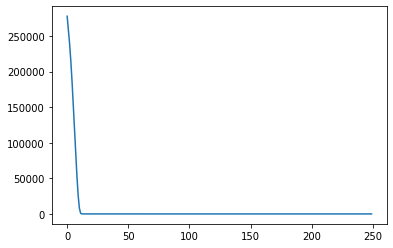

In [39]:
sns.lineplot(range(len(loss)),loss)# plot of the loss value throughout the epoch iterations

In [41]:
model.evaluate(X_train,y_train,verbose=0) # compute the loss value for X_train and Y_train

23.749258041381836

In [42]:
model.evaluate(X_test,y_test,verbose=0) # test sets loss value
# loss values for the test and train sets should relatively be close to each other

25.03138542175293

In [43]:
pred=model.predict(X_test)

10/10 [==============================] - 1s 5ms/step


In [46]:
pred=pd.Series(pred.reshape(300,))

In [47]:
pred

0      405.383118
1      623.813110
2      592.381287
3      572.453003
4      366.669678
          ...    
295    529.236816
296    515.502014
297    609.914673
298    417.062012
299    410.970581
Length: 300, dtype: float32

In [52]:
pred_df=pd.DataFrame(data=y_test,columns=['Y test'])

In [55]:
pred_df=pd.concat([pred_df,pred],axis=1)

In [57]:
pred_df.columns=['Y test','Model predictions']

In [58]:
pred_df

,Y test,Model predictions
0,402.296319,405.383118
1,624.156198,623.813110
2,582.455066,592.381287
3,578.588606,572.453003
4,371.224104,366.669678
...,...,...
295,525.704657,529.236816
296,502.909473,515.502014
297,612.727910,609.914673
298,417.569725,417.062012


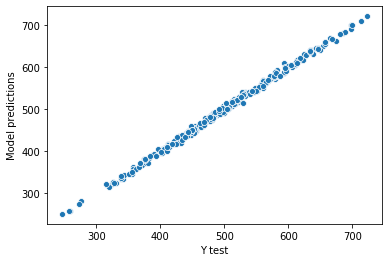

In [59]:
sns.scatterplot(x='Y test',y='Model predictions',data=pred_df)

In [60]:
pred_df['Error']=pred_df['Y test']-pred_df['Model predictions']

In [61]:
pred_df['Absolute Error']=abs(pred_df['Y test']-pred_df['Model predictions'])

In [62]:
pred_df

,Y test,Model predictions,Error,Absolute Error
0,402.296319,405.383118,-3.086799,3.086799
1,624.156198,623.813110,0.343088,0.343088
2,582.455066,592.381287,-9.926220,9.926220
3,578.588606,572.453003,6.135604,6.135604
4,371.224104,366.669678,4.554426,4.554426
...,...,...,...,...
295,525.704657,529.236816,-3.532160,3.532160
296,502.909473,515.502014,-12.592541,12.592541
297,612.727910,609.914673,2.813237,2.813237
298,417.569725,417.062012,0.507713,0.507713


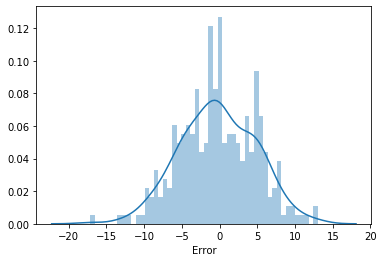

In [63]:
sns.distplot(pred_df['Error'],bins=50)

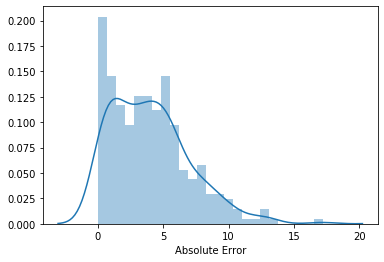

In [66]:
sns.distplot(pred_df['Absolute Error'],bins=25)

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [68]:
mean_absolute_error(pred_df['Y test'],pred_df['Model predictions'])

4.008000812227672

In [69]:
mean_squared_error(pred_df['Y test'],pred_df['Model predictions'])

25.031376864748545

In [70]:
model.evaluate(X_test,y_test,verbose=0)# Essentially the same thing, difference just due to precision

25.03138542175293

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save('new model.h5')# save the model into HDF5 file

In [74]:
loaded_model=load_model('new model.h5')# to load the model with no need to run all the previous code

In [77]:
new_datapoint=[[998,1000]]# new added datapoint (feature1, freature2)

In [78]:
new_datapoint=scaler.transform(new_datapoint)# scale new datapoint

In [79]:
loaded_model.predict(new_datapoint)# we used the loaded model to predict the new entry (X,Y)

1/1 [==============================] - 0s 340ms/step


array([[419.78406]], dtype=float32)